In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
flights = sns.load_dataset('flights')
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


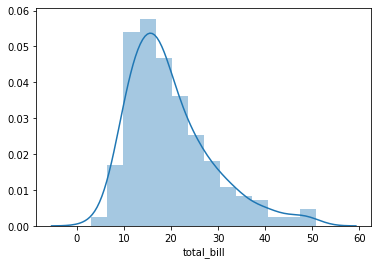

In [27]:
#製作直方圖，displot結合matplotlib中的hist函式，以及kdeplot、rugplot函式。預設為kde=True、rug=False
sns.distplot(tips['total_bill'])


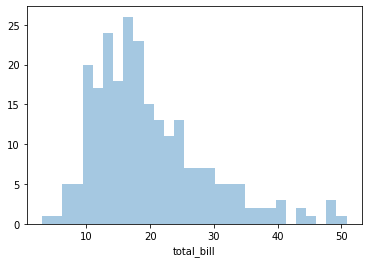

In [28]:
#移除kde只剩直方圖
sns.distplot(tips['total_bill'],kde=False,bins=30)

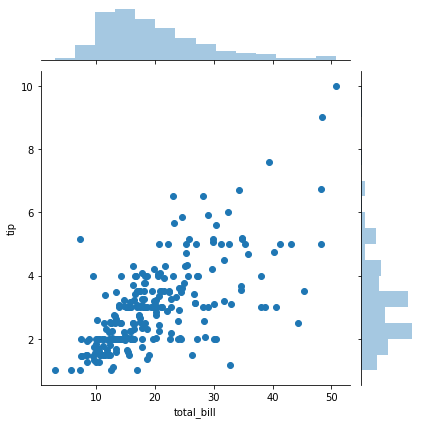

In [29]:
#jointplot可以結合兩種圖及雙變數資料，以下即是結合直方圖及散佈圖
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

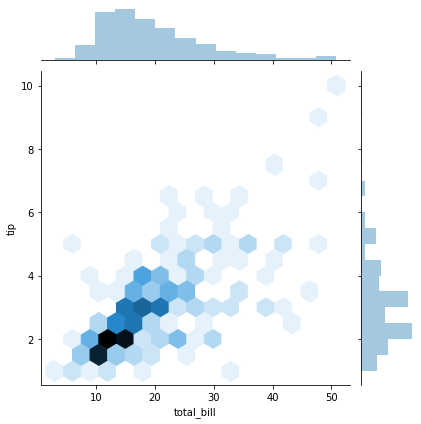

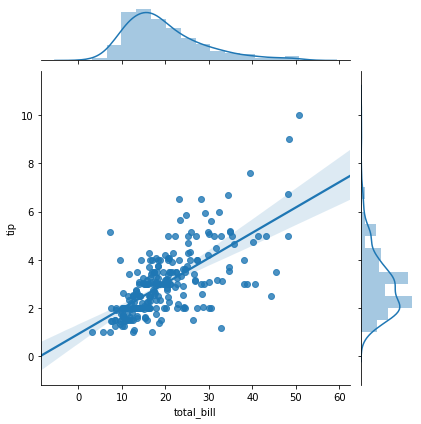

In [30]:
#kind的選擇有scatter、reg、resid、kde、hex
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

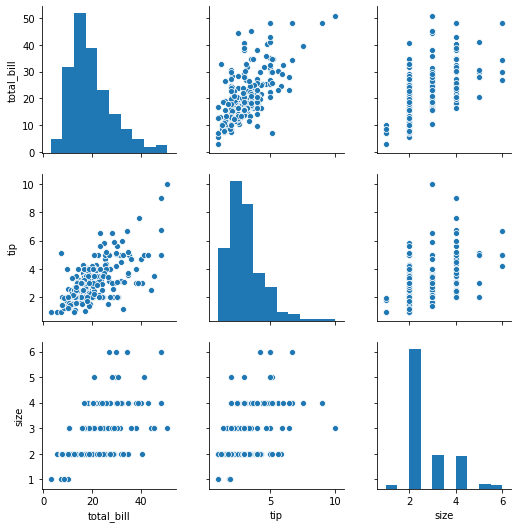

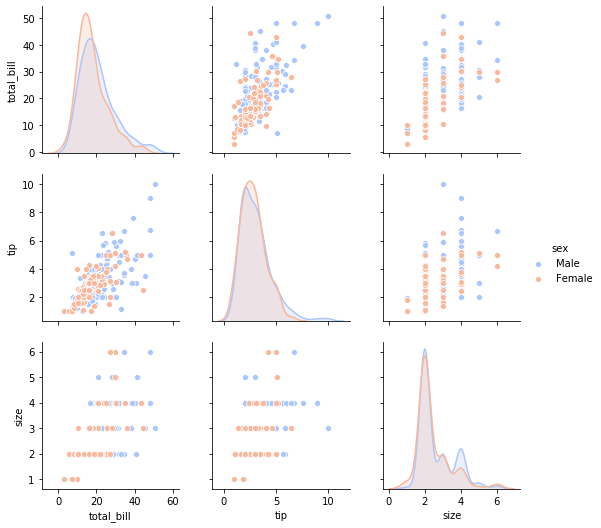

In [31]:
#pairplot（可以用快速視覺化的圖表將資料集中有數字的欄位圖像化）
sns.pairplot(tips)

#可使用hue進一步區分不同變數，palette=顏色主題。
sns.pairplot(tips,hue='sex',palette='coolwarm')

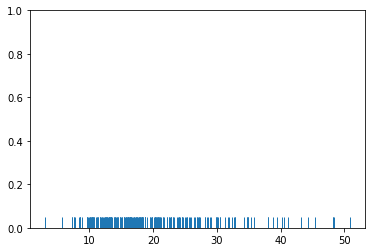

In [32]:
#rugplotg是將單一變數在單一x軸上直接畫出
sns.rugplot(tips['total_bill'])

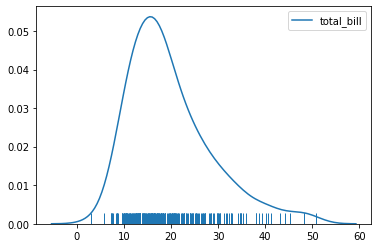

In [33]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

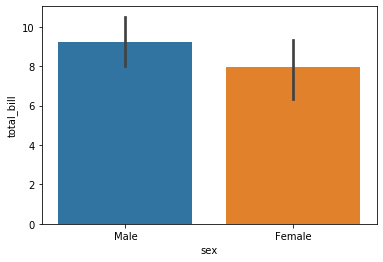

In [34]:
import numpy as np

#柱狀圖seaborn.barplot(x,y,data)
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

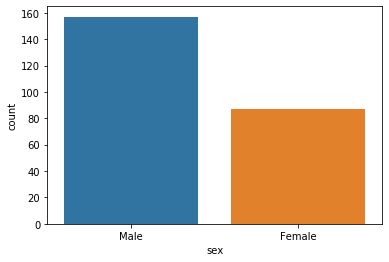

In [37]:
#countplot和histogram類似，計算單一變數的次數
sns.countplot(x='sex',data=tips)

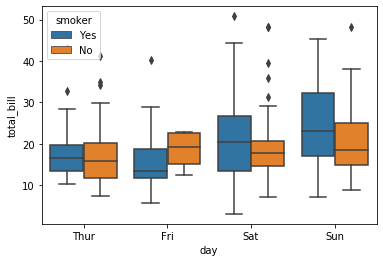

In [39]:
#製作盒鬚圖，hue可作為進一步區分特定變數的工具
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

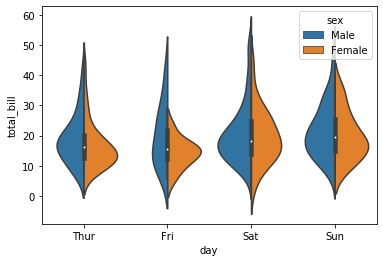

In [40]:
#小提琴圖比起盒鬚圖更能強調資料密集在哪
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

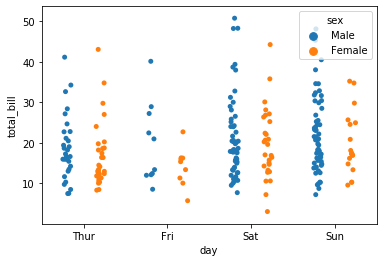

In [43]:
#stripplot類似散佈圖，但適用於類別資料，但因為點容易重疊在一起，所以使用jitter=True可以解決這樣的問題
#使用hue可以進一步區分變數，dodge則是可以將hue區分的變數分成兩行
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex',dodge=True,jitter=True)

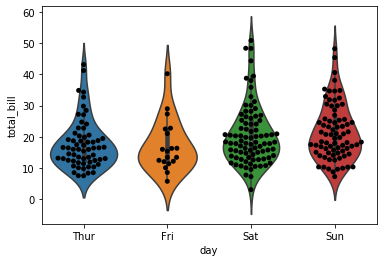

In [44]:
#swarmplot類似stripplot，但會將類別資料分散顯示，但樣本過多的時候就和stripplot差不多
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


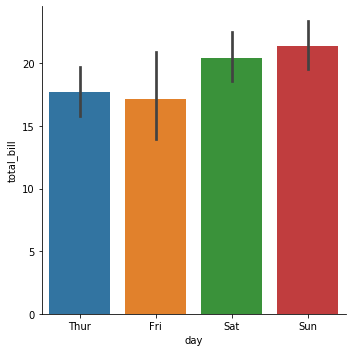

In [45]:
#使用factorplot的話，則可在參數中設定kind=圖表名稱來設定圖表
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

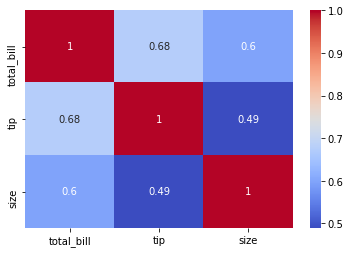

In [46]:
tc = tips.corr()
#先將資料轉成matrix，再直接用heatmap()即可。annot=True代表會出現數值。cmap=顏色主題。
sns.heatmap(tc,annot=True,cmap='coolwarm')

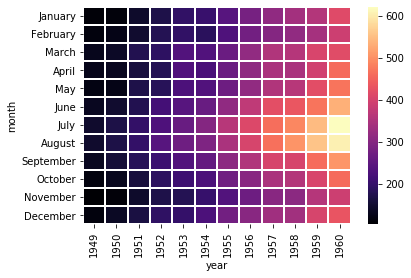

In [47]:
#建立樞紐分析表
fp=flights.pivot_table(index='month',columns='year',values='passengers')

#linecolor設定每個資料點外框顏色，linewidths設定資料點外框寬度
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)

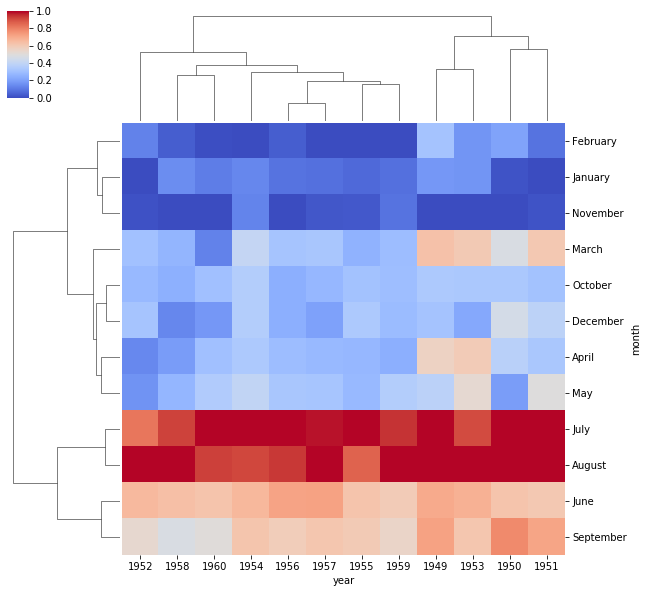

In [48]:
#clustermap使用hierarchal clustering來建立heatmap。standard_scale等於資料比例尺
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


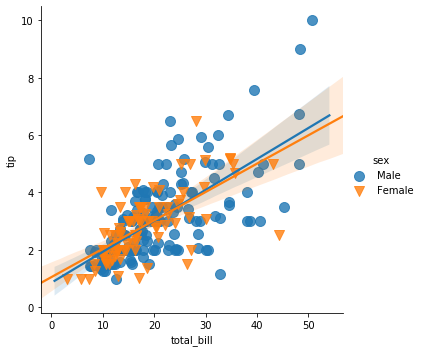

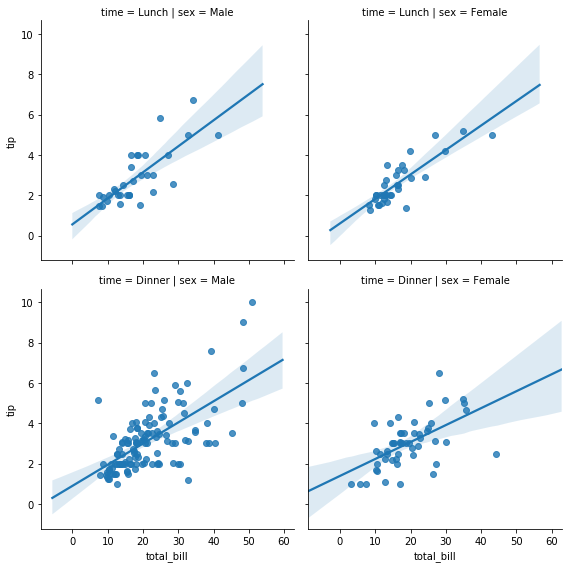

In [49]:
#lmplot(x,y,data)
#hue可進一步區分第三個變數，markers則可讓hue想區分的變數資料符號不同
#scatter_kws={'key':value}可改變資料點的大小
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100})

#col=第三變數，row=第四變數
#aspect ratio=長寬比，size=尺寸
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time',
          aspect=1,size=4)

In [55]:
#使用鳶尾花資料集練習
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
#檢查鳶尾花資料集品種有幾種
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

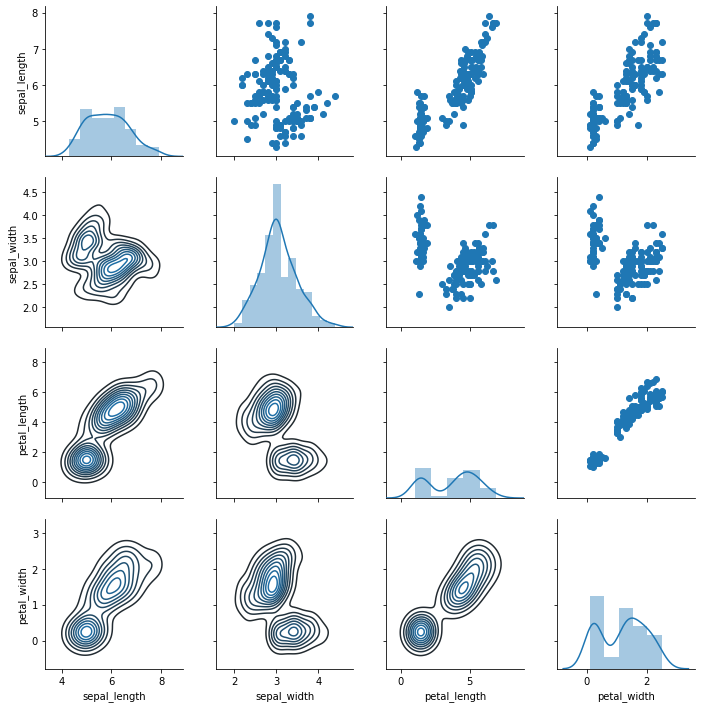

In [57]:
#PairGrid屬於subplot grid，類似pairplot，只是客製化程度更高
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

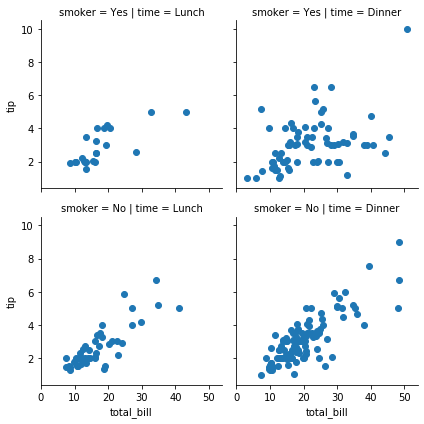

In [58]:
#FacetGrid是一種常見基於資料變數來建立grid（格子）的方法
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

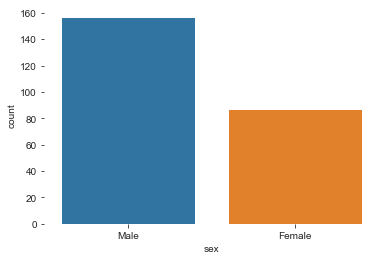

In [61]:
#style設定圖表風格
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

#despine()只會去掉表格外框右邊及上面的線，如果所有外框都不要則額外設定left=True,bottom=True
sns.despine(left=True,bottom=True)

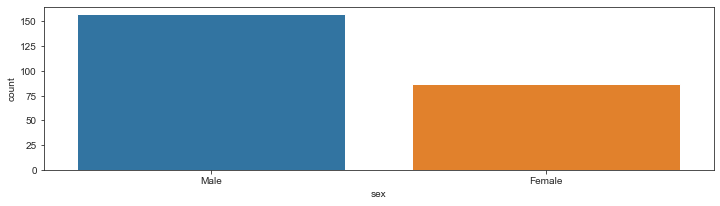

In [62]:
#可以設定figuresize
plt.figure(figsize=[12,3])
sns.countplot(x='sex',data=tips)

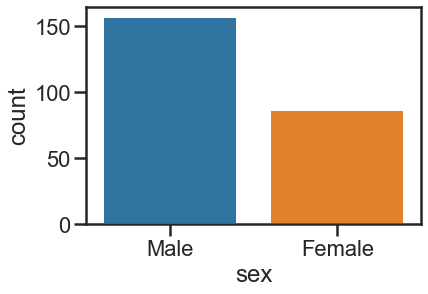

In [63]:
#set_context可設定該圖表預定想放在哪種文件上展示
sns.set_context('poster')
sns.countplot(x='sex',data=tips)